In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset into a dataframe. Define the columns in a list and pass it as a parameter.

In [2]:
columns=['sepal length in cm', 'sepal width in cm','petal length in cm','petal width in cm' ,'class']
data = pd.read_csv("datasets/iris.data",names=columns)

Look into the dimensions of the dataframe.

In [3]:
data.shape

(150, 5)

Decribe method shows all the necessary quantites like mean,std,count,min,max of all the numerical columns in the dataset.

In [4]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Creating a box plot to analyse variables. 

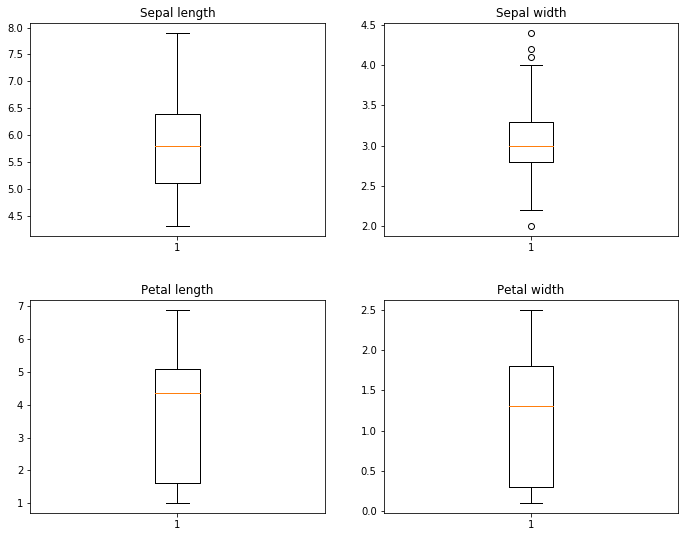

In [5]:
#create a subplot grid of 2x2 plots with the given size 
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax[0,0].boxplot(data['sepal length in cm'])
ax[0,0].set_title("Sepal length")
ax[0,1].boxplot(data['sepal width in cm'])
ax[0,1].set_title("Sepal width")
ax[1,0].boxplot(data['petal length in cm'])
ax[1,0].set_title("Petal length")
ax[1,1].boxplot(data['petal width in cm'])
ax[1,1].set_title("Petal width")
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.3, wspace=0.2)

plt.show()

We can even use the histogram to study the distibution of datapoints

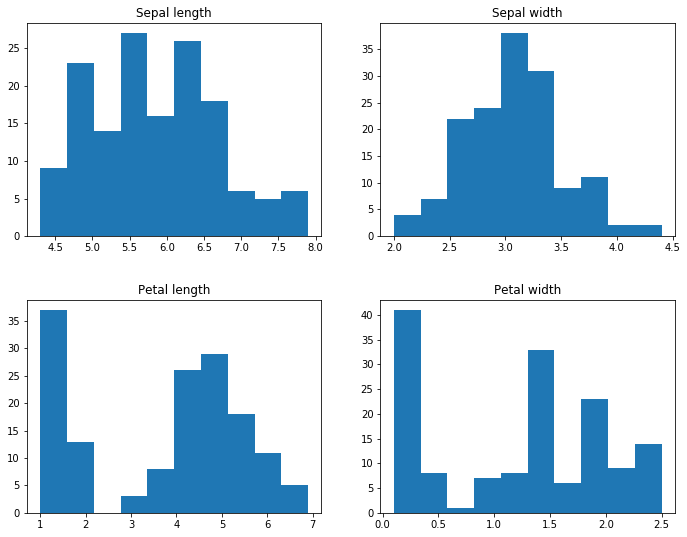

In [6]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax[0,0].hist(data['sepal length in cm'])
ax[0,0].set_title("Sepal length")
ax[0,1].hist(data['sepal width in cm'])
ax[0,1].set_title("Sepal width")
ax[1,0].hist(data['petal length in cm'])
ax[1,0].set_title("Petal length")
ax[1,1].hist(data['petal width in cm'])
ax[1,1].set_title("Petal width")
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.3, wspace=0.2)

For discovering the relationhips amongst the variables, we used the pairplot() which plots the scatterplots for inter-variables comparison and a histogram for a variable's distribution or comparison with itself.

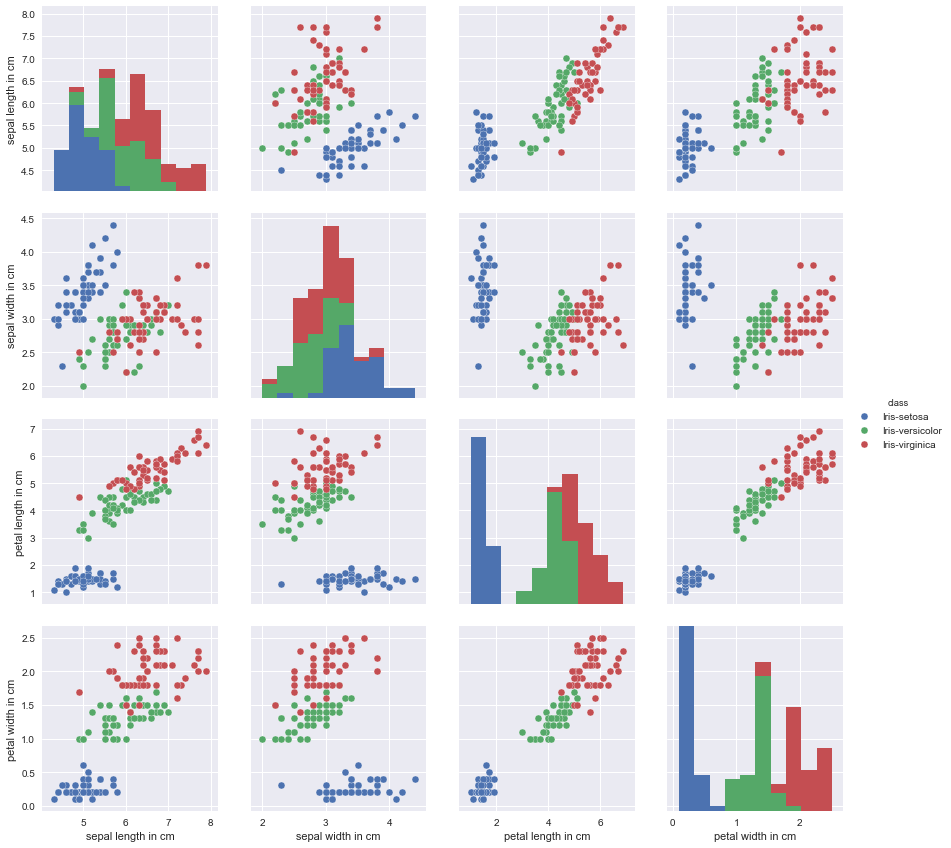

In [7]:
import seaborn as sns
sns.set()
chart=sns.pairplot(data,hue="class",size=3)
chart.savefig("output.png")

Using the train and test splitting function to randomly separate the data into training and testing set. We have used the default 75%-25% splits.

In [8]:
from sklearn.model_selection import train_test_split
arr = data.values
X = arr[:,0:4]
y = arr[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

Fitting the KNN model on training pair using the KNeighborsClassifier and one neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Now for prediction, predict() function build the model on testing pair and produces the output. We check its accuracy using score() method

In [10]:
pred = knn.predict(X_test)
print("The model has a accuracy of "+str((knn.score(X_test,y_test)*100)))

The model has a accuracy of 97.36842105263158
